스크래핑된 뉴스 읽어오기

In [ ]:
import csv

In [2]:
news = []
with open('hg.csv', encoding='utf8', newline='\r\n') as f:
    reader = csv.reader(f)
    for row in reader:
        news.append(row[0])

형태소 분석기

In [4]:
from konlpy.tag import Twitter

In [5]:
tagger = Twitter()

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
cv = CountVectorizer(tokenizer=tagger.nouns, max_features=50)

In [8]:
tdf = cv.fit_transform(news)

In [9]:
tdf

<455x50 sparse matrix of type '<class 'numpy.int64'>'
	with 920 stored elements in Compressed Sparse Row format>

단어 목록

In [10]:
words = cv.get_feature_names()

In [11]:
words

['가격',
 '결함',
 '공개',
 '교체',
 '구입',
 '그랜저',
 '그릴',
 '년',
 '뉴스',
 '도',
 '드디어',
 '디젤',
 '말리부',
 '배기가스',
 '백곰',
 '비교',
 '사진',
 '색상',
 '샷',
 '스마트',
 '승기',
 '시',
 '신차',
 '신형',
 '실내',
 '아슬란',
 '알페온',
 '엔진',
 '연비',
 '영상',
 '요',
 '원가',
 '유입',
 '의',
 '이',
 '이미지',
 '자동차',
 '정리',
 '중복',
 '질문',
 '차',
 '차량',
 '출시',
 '키',
 '택시',
 '특종',
 '포샵',
 '현대',
 '현대차',
 '휠']

한 글자 짜리 단어 빼기

In [12]:
def get_word(doc):
    nouns = tagger.nouns(doc)
    return [noun for noun in nouns if len(noun) > 1]

In [13]:
cv = CountVectorizer(tokenizer=get_word, max_features=50)

In [14]:
tdf = cv.fit_transform(news)

In [15]:
words = cv.get_feature_names()

In [16]:
words

['가격',
 '결함',
 '공개',
 '교체',
 '구입',
 '그랜저',
 '그릴',
 '뉴스',
 '동영상',
 '드디어',
 '디젤',
 '말리부',
 '문의',
 '문제',
 '배기가스',
 '백곰',
 '비교',
 '사진',
 '색상',
 '스마트',
 '승기',
 '신차',
 '신형',
 '실내',
 '아슬란',
 '알페온',
 '엔진',
 '연비',
 '영상',
 '원가',
 '유입',
 '이미지',
 '자동차',
 '절대',
 '정도',
 '정리',
 '중고차',
 '중복',
 '질문',
 '차량',
 '출시',
 '캘리',
 '택시',
 '특종',
 '파노라마',
 '파썬',
 '포샵',
 '해결',
 '현대',
 '현대차']

단어별 출현 빈도

In [17]:
import numpy

In [18]:
count_mat = tdf.sum(axis=0)

In [19]:
count_mat

matrix([[  5,  12,   6,   5,   5, 455,   8,   5,   4,   5,   6,   5,   4,
           4,  22,  14,  18,  26,   6,   5,  10,   5,   7,  17,   6,  10,
          11,   6,   9,   5,   9,   8,   9,   5,   5,   5,   5,  11,   6,
           6,   5,   5,   7,  14,   4,   4,   6,   4,  32,  12]], dtype=int64)

In [20]:
count = numpy.squeeze(numpy.asarray(count_mat))

In [21]:
count

array([  5,  12,   6,   5,   5, 455,   8,   5,   4,   5,   6,   5,   4,
         4,  22,  14,  18,  26,   6,   5,  10,   5,   7,  17,   6,  10,
        11,   6,   9,   5,   9,   8,   9,   5,   5,   5,   5,  11,   6,
         6,   5,   5,   7,  14,   4,   4,   6,   4,  32,  12], dtype=int64)

In [22]:
word_count = list(zip(words, count))

In [23]:
word_count

[('가격', 5),
 ('결함', 12),
 ('공개', 6),
 ('교체', 5),
 ('구입', 5),
 ('그랜저', 455),
 ('그릴', 8),
 ('뉴스', 5),
 ('동영상', 4),
 ('드디어', 5),
 ('디젤', 6),
 ('말리부', 5),
 ('문의', 4),
 ('문제', 4),
 ('배기가스', 22),
 ('백곰', 14),
 ('비교', 18),
 ('사진', 26),
 ('색상', 6),
 ('스마트', 5),
 ('승기', 10),
 ('신차', 5),
 ('신형', 7),
 ('실내', 17),
 ('아슬란', 6),
 ('알페온', 10),
 ('엔진', 11),
 ('연비', 6),
 ('영상', 9),
 ('원가', 5),
 ('유입', 9),
 ('이미지', 8),
 ('자동차', 9),
 ('절대', 5),
 ('정도', 5),
 ('정리', 5),
 ('중고차', 5),
 ('중복', 11),
 ('질문', 6),
 ('차량', 6),
 ('출시', 5),
 ('캘리', 5),
 ('택시', 7),
 ('특종', 14),
 ('파노라마', 4),
 ('파썬', 4),
 ('포샵', 6),
 ('해결', 4),
 ('현대', 32),
 ('현대차', 12)]

빈도 순 정렬

In [24]:
import operator

In [25]:
sorted(word_count, key=operator.itemgetter(1), reverse=True)

[('그랜저', 455),
 ('현대', 32),
 ('사진', 26),
 ('배기가스', 22),
 ('비교', 18),
 ('실내', 17),
 ('백곰', 14),
 ('특종', 14),
 ('결함', 12),
 ('현대차', 12),
 ('엔진', 11),
 ('중복', 11),
 ('승기', 10),
 ('알페온', 10),
 ('영상', 9),
 ('유입', 9),
 ('자동차', 9),
 ('그릴', 8),
 ('이미지', 8),
 ('신형', 7),
 ('택시', 7),
 ('공개', 6),
 ('디젤', 6),
 ('색상', 6),
 ('아슬란', 6),
 ('연비', 6),
 ('질문', 6),
 ('차량', 6),
 ('포샵', 6),
 ('가격', 5),
 ('교체', 5),
 ('구입', 5),
 ('뉴스', 5),
 ('드디어', 5),
 ('말리부', 5),
 ('스마트', 5),
 ('신차', 5),
 ('원가', 5),
 ('절대', 5),
 ('정도', 5),
 ('정리', 5),
 ('중고차', 5),
 ('출시', 5),
 ('캘리', 5),
 ('동영상', 4),
 ('문의', 4),
 ('문제', 4),
 ('파노라마', 4),
 ('파썬', 4),
 ('해결', 4)]

워드 클라우드

In [37]:
%matplotlib inline

In [38]:
from wordcloud import WordCloud

In [39]:
from matplotlib import pyplot

In [40]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)

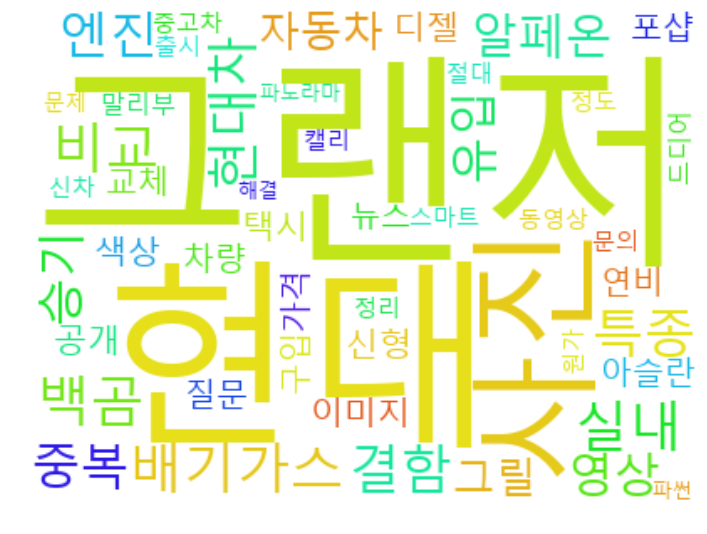

In [41]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

그랜저 게시판 결과 배기가스, 결함 등 안좋은 단어들이 보인다

단어간 상관계수

In [26]:
word_corr = numpy.corrcoef(tdf.todense(), rowvar=0)

In [27]:
word_corr

array([[ 1.        , -0.01734872, -0.01218516, ..., -0.00992706,
        -0.02899236, -0.01734872],
       [-0.01734872,  1.        , -0.01902572, ...,  0.13142672,
         0.00836991,  0.1440933 ],
       [-0.01218516, -0.01902572,  1.        , ..., -0.01088665,
        -0.03179489, -0.01902572],
       ..., 
       [-0.00992706,  0.13142672, -0.01088665, ...,  1.        ,
         0.06617353,  0.27835339],
       [-0.02899236,  0.00836991, -0.03179489, ...,  0.06617353,
         1.        , -0.04526824],
       [-0.01734872,  0.1440933 , -0.01902572, ...,  0.27835339,
        -0.04526824,  1.        ]])

In [28]:
edges = []
for i in range(len(words)):
    for j in range(i + 1, len(words)):
        edges.append((words[i], words[j], word_corr[i, j]))

In [29]:
edges = sorted(edges, key=operator.itemgetter(2), reverse=True)

In [30]:
edges = edges[:50]

In [31]:
edge_list = [(word1, word2) for word1, word2, weight in edges]
weight_list = [weight for word1, word2, weight in edges]

상관관계 시각화

In [32]:
import networkx

In [33]:
G = networkx.Graph()

edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight)
    edge_set.add((word1, word2))

In [34]:
import numpy
import matplotlib
from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot

from IPython.core.pylabtools import figsize, getfigs

from pylab import *
from numpy import *

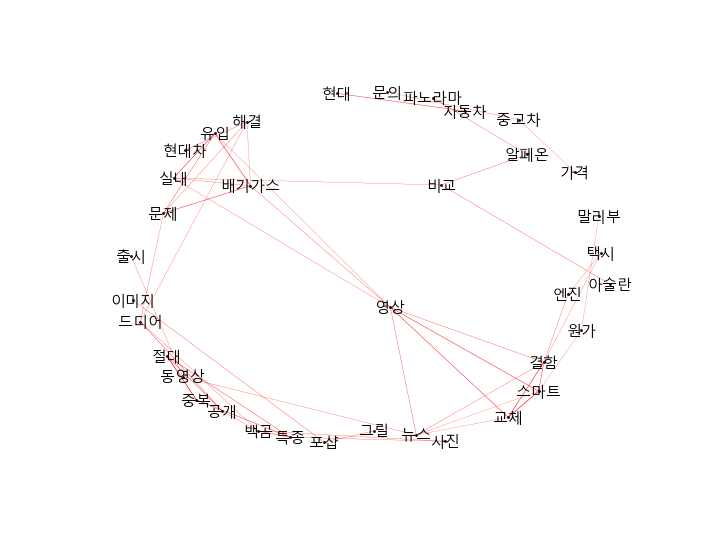

In [42]:
position = networkx.spring_layout(G, iterations=30)
pyplot.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=3)
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='red')
networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic')
plt.axis('off')
pyplot.show()

결함이라는 직접적인 단어가 나타났으며주로 엔진과 교체쪽에 연관되었고 배기가스는 실내와 유입으로 연관된 것은 실내 배기가스 유입이 문제된것이 많이 나타나 관련이 높은것으로 보인다